In [3]:
import pandas as pd
import numpy as np

In [4]:
dff=pd.read_csv("BDdata.csv")

In [5]:
dff = dff.set_index('year')

In [6]:
dff.tail()

,co2,lifeexpectancy,Infant Mortality Rate,Population Growth Rate,Fertility Rate,GDPpercapita
year,,,,,,
2015,0.459,71.514,3.06,1.117284,2.120,1248.453398
2016,0.467,71.785,2.93,1.091300,2.090,1401.620628
2017,0.493,72.052,2.80,1.070244,2.062,1563.913699
2018,0.513,72.320,2.67,1.050045,2.036,1698.350394
2019,0.660,72.591,2.56,1.042001,2.011,1855.739824


In [7]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [8]:
adf_test(dff['lifeexpectancy'])

1. ADF :  -3.190858141003162
2. P-Value :  0.020519981717534108
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 48
5. Critical Values :
	 1% :  -3.5745892596209488
	 5% :  -2.9239543084490744
	 10% :  -2.6000391840277777


In [13]:
stepwise_fit = auto_arima(dff['lifeexpectancy'], start_p=0, start_q=0,
                          max_p=4, max_q=4, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=38.983, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-79.921, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=101.960, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-214.614, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-294.209, Time=0.44 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-308.520, Time=0.53 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-319.576, Time=0.82 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-321.168, Time=0.65 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-278.150, Time=0.54 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-320.794, Time=0.81 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-315.093, Time=0.63 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-319.367, Time=0.80 sec

Best model:  ARIMA(3,1,1)(0,0,0)[0] intercept


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(3, 1, 1)   Log Likelihood                 166.584
Date:                Fri, 06 Aug 2021   AIC                           -321.168
Time:                        16:56:22   BIC                           -308.703
Sample:                             0   HQIC                          -316.302
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0166      0.007      2.357      0.018       0.003       0.030
ar.L1          2.4679      0.067     36.771      0.000       2.336       2.599
ar.L2         -2.2019      0.122    -18.037      0.000      -2.441      -1.963
ar.L3          0.6980      0.068     10.222      0.000       0.564       0.832
ma.L1          0.9587      0.087     11.009      0.000       0.788       1.129
sigma2         0.0002   3.05e-05      5.309      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                13.29
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                            -0.86
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [14]:
cstepwise_fit = auto_arima(dff['lifeexpectancy'], 
                          suppress_warnings=True)           

cstepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(3, 1, 1)   Log Likelihood                 166.584
Date:                Fri, 06 Aug 2021   AIC                           -321.168
Time:                        16:59:39   BIC                           -308.703
Sample:                             0   HQIC                          -316.302
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0166      0.007      2.357      0.018       0.003       0.030
ar.L1          2.4679      0.067     36.771      0.000       2.336       2.599
ar.L2         -2.2019      0.122    -18.037      0.000      -2.441      -1.963
ar.L3          0.6980      0.068     10.222      0.000       0.564       0.832
ma.L1          0.9587      0.087     11.009      0.000       0.788       1.129
sigma2         0.0002   3.05e-05      5.309      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                13.29
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                            -0.86
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
from statsmodels.tsa.arima_model import ARIMA

In [16]:
print(dff.shape)
train=dff.iloc[:-30]
test=dff.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(60, 6)
(30, 6) (30, 6)
co2                         0.112000
lifeexpectancy             58.210000
Infant Mortality Rate       9.970000
Population Growth Rate      2.429599
Fertility Rate              4.495000
GDPpercapita              306.268704
Name: 1990, dtype: float64 co2                          0.660000
lifeexpectancy              72.591000
Infant Mortality Rate        2.560000
Population Growth Rate       1.042001
Fertility Rate               2.011000
GDPpercapita              1855.739824
Name: 2019, dtype: float64


In [17]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(dff['lifeexpectancy'],order=(3,1,1))
model1=model.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D.lifeexpectancy   No. Observations:                   59
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 167.397
Method:                       css-mle   S.D. of innovations              0.013
Date:                Fri, 06 Aug 2021   AIC                           -322.794
Time:                        17:00:03   BIC                           -310.329
Sample:                             1   HQIC                          -317.928
                                                                              
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.4558      0.087      5.220      0.000       0.285       0.627
ar.L1.D.lifeexpectancy     2.5167      0.081     31.236      0.000       2.359       2.675
ar.L2.D.lifeexpectancy    -2.2879      0.148    -15.508      0.000      -2.577      -1.999
ar.L3.D.lifeexpectancy     0.7386      0.080      9.258      0.000       0.582       0.895
ma.L1.D.lifeexpectancy     0.8833      0.074     11.913      0.000       0.738       1.029
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9529           -0.4774j            1.0658           -0.0739
AR.2            0.9529           +0.4774j            1.0658            0.0739
AR.3            1.1920           -0.0000j            1.1920           -0.0000
MA.1           -1.1321           +0.0000j            1.1321            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='year'>

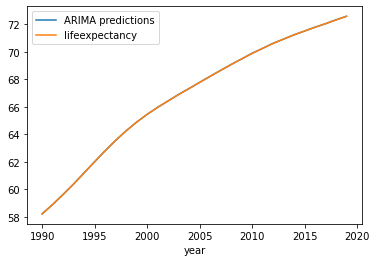

In [18]:
start=len(train)
end=len(train)+len(test)-1
pred=model1.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['lifeexpectancy'].plot(legend=True)

In [19]:
from sklearn.metrics import mean_squared_error,  mean_absolute_error

In [22]:
pred

year
1990    58.200101
1991    58.881705
1992    59.618727
1993    60.375755
1994    61.191206
1995    61.997454
1996    62.798248
1997    63.550503
1998    64.248736
1999    64.880666
2000    65.447160
2001    65.957303
2002    66.421810
2003    66.898514
2004    67.328903
2005    67.774458
2006    68.217640
2007    68.648535
2008    69.076938
2009    69.479328
2010    69.895490
2011    70.247939
2012    70.620779
2013    70.923177
2014    71.242512
2015    71.510454
2016    71.794874
2017    72.048014
2018    72.331350
2019    72.588609
Name: ARIMA predictions, dtype: float64

In [19]:
dff['life expectancy forecast']=pred

In [20]:
dff.tail()

,co2,lifeexpectancy,Infant Mortality Rate,Population Growth Rate,Fertility Rate,GDPpercapita,life expectancy forecast
year,,,,,,,
2015,0.459,71.514,3.06,1.117284,2.120,1248.453398,71.510454
2016,0.467,71.785,2.93,1.091300,2.090,1401.620628,71.794874
2017,0.493,72.052,2.80,1.070244,2.062,1563.913699,72.048014
2018,0.513,72.320,2.67,1.050045,2.036,1698.350394,72.331350
2019,0.660,72.591,2.56,1.042001,2.011,1855.739824,72.588609


In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing,SimpleExpSmoothing, Holt

In [28]:
holt=Holt(dff.lifeexpectancy,exponential=True).fit()

In [29]:
holt_pred = holt.predict(start=start, end=end)

<AxesSubplot:xlabel='year'>

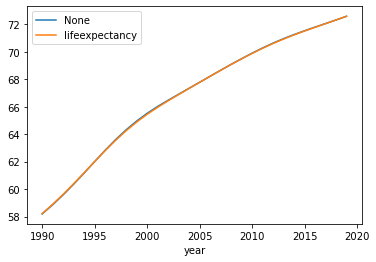

In [30]:
holt_pred.plot(legend=True)
test['lifeexpectancy'].plot(legend=True)

In [31]:
holt_pred

year
1990    58.190597
1991    58.856092
1992    59.579967
1993    60.353975
1994    61.167945
1995    62.002651
1996    62.824775
1997    63.604219
1998    64.317077
1999    64.954644
2000    65.518197
2001    66.017938
2002    66.468959
2003    66.907406
2004    67.345130
2005    67.778961
2006    68.217902
2007    68.655857
2008    69.085774
2009    69.498619
2010    69.900469
2011    70.279257
2012    70.633012
2013    70.957744
2014    71.255487
2015    71.533277
2016    71.798124
2017    72.057027
2018    72.319993
2019    72.588997
dtype: float64

In [32]:
dff['holt forecast']=holt_pred

In [33]:
dff.tail()

,co2,lifeexpectancy,Infant Mortality Rate,Population Growth Rate,Fertility Rate,GDPpercapita,life expectancy forecast,holt forecast
year,,,,,,,,
2015,0.459,71.514,3.06,1.091300,2.120,1248.453398,71.510454,71.533277
2016,0.467,71.785,2.93,1.070244,2.090,1401.620628,71.794874,71.798124
2017,0.493,72.052,2.80,1.050045,2.062,1563.913699,72.048014,72.057027
2018,0.513,72.320,2.67,1.042001,2.036,1698.350394,72.331350,72.319993
2019,NaN,72.591,2.56,NaN,NaN,1855.739824,72.588609,72.588997


In [34]:
dff.to_excel('save1_file.xlsx')

In [23]:
predfuture=model1.predict(start=end+1,end=end+7,typ='levels').rename('ARIMA predictions')

In [24]:
predfuture

59    72.874055
60    73.179210
61    73.514619
62    73.884511
63    74.288284
64    74.720783
65    75.173525
Name: ARIMA predictions, dtype: float64